# Generate spatial rate maps

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
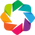

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import tools, merging
import spatial_rate_map as smap
import holoviews as hv
hv.extension('bokeh')
%load_ext autoreload
%autoreload 2

# Step 1: Get Data

### check for available datasets
returns {animal:days}

In [62]:
tools.get_remote_data_catalogue()

{'JZ1': ['1', '2']}

In [63]:
tools.get_local_data_catalogue()

{'JZ1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}

#### download the data that you want if you haven't already:
`tools.download_data({animal:days})`

### specify datafilters
- In this case we want the first two days of animal *JZ1* -  spikes and position for ntrodes in MEC while the animal was on the openfield
- any column or index field in ntrodeInfo, taskInfo, or individual datatype dataframes can be used as a datafilter.   
*todo: make a notebook showing how to check for, and use, all the different filter options*

In [72]:
datafilter = {}
datafilter['animals_days'] = {'JZ1':[]} # leave days list empty to grab all available days for that animal
datafilter['datatypes'] = ['position', 'spikes']
datafilter['area'] = ['area == ["mec"]',]
datafilter['environment'] = ['environment == ["openfield"]', ]

In [73]:
%%time
data = tools.load_data(datafilter)

/opt/DR_swapdata10/JZ1/pyphy/20161114_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161115_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161116_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161117_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161118_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161119_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161121_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161122_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161125_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161128_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161129_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161130_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161201_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161202_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161114_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161115_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161116_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161117_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161118_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161119_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161121_JZ1.h5
/opt/DR_swapdata10/JZ1/pyphy/20161122_JZ1.h5
/opt/DR_sw

KeyError: 'No object named spikes in the file'

In [18]:
data['spikes'].head()

head_direction  sampleindex  \
animal day epoch ntrode cluster timedelta                                      
JZ1    1   6     2      4       02:17:56.318733       -2.661241    248289562   
                                02:17:56.318733       -0.587641    248289562   
                                02:17:56.318733       -0.811995    248289562   
                                02:17:56.318733       -1.319297    248289562   
                                02:17:56.318733        0.275206    248289562   

                                                    speed  x_position  \
animal day epoch ntrode cluster timedelta                               
JZ1    1   6     2      4       02:17:56.318733  2.530817   23.398752   
                                02:17:56.318733  0.199929   26.323201   
                                02:17:56.318733  0.558165   27.749218   
                                02:17:56.318733  4.704658   40.707172   
                                02:17:56.318733  1.240353   48.826582   

                                                 y_position  
animal day epoch ntrode cluster timedelta                    
JZ1    1   6     2      4       02:17:56.318733   36.117688  
                                02:17:56.318733   56.954213  
                                02:17:56.318733   52.566645  
                                02:17:56.318733   11.411818  
                                02:17:56.318733   25.229165

In [19]:
data['position'].head()

time  x_position  y_position  \
animal day epoch timedelta                                                 
JZ1    1   6     02:17:56.199800 02:17:56.199800   23.103026   36.552946   
                 02:17:56.233466 02:17:56.233466   23.184507   36.400532   
                 02:17:56.267066 02:17:56.267066   23.277276   36.258774   
                 02:17:56.300666 02:17:56.300666   23.398752   36.117688   
                 02:17:56.334300 02:17:56.334300   23.502401   35.999961   

                                  head_direction     speed  
animal day epoch timedelta                                  
JZ1    1   6     02:17:56.199800       -2.576741  2.591167  
                 02:17:56.233466       -2.616583  2.581048  
                 02:17:56.267066       -2.643939  2.560883  
                 02:17:56.300666       -2.661241  2.530817  
                 02:17:56.334300       -2.670043  2.491072

# Step 2: Calculate Spatial Firing

In [66]:
%%time
occnorm_FR_maps = smap.calc_spatial_firing_rate_maps(data)

pos cols found in df, recalculating pos
CPU times: user 4.02 s, sys: 260 ms, total: 4.28 s
Wall time: 4.27 s


# step 3: plot

In [67]:
hv_dict = {map_kwargs : hv.Image(occnorm_FR_map, group='firing_rate') for map_kwargs, occnorm_FR_map in occnorm_FR_maps.items()}

In [68]:
ly_hv = hv.NdLayout(hv_dict, ['animal', 'day', 'epoch', 'ntrode', 'cluster'])

In [69]:
ly_hv.groupby(['animal', 'day', 'ntrode']).cols(1)

:NdLayout   [animal,day,ntrode]
   :NdLayout   [epoch,cluster]
      :Image   [x,y]   (z)

# Step 3: Plot Results